<a href="https://colab.research.google.com/github/miguelmota2301/ciencia_de_dados/blob/main/Pr%C3%A1tica_2_Pre_Processamento_02_05_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Miguel Feliciano Mota Alves

# Pre-Processamento de Dados

Refere-se à etapa anterior ao processamento dos dados (modelagem).

Nessa etapa, devemos verificar os dados e, se necessário, alterar alguns fatores, como:


*   Dados Ausentes
*   Dados Redundantes
*   Outliers




## Importando Bibliotecas

In [ ]:
# Importando algumas bibliotecas já apresentadas anteriormente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [ ]:
# Criando um dicionário com 4 "chaves" e 7 valores cada uma
d = {
    'nome': ['José', 'Miguel', 'Maria', 'Cláudia', 'Marta', 'Júlio', 'Mônica'],
    'altura (cm)': [175, 182, 168, 155, 160, 1.80, 170],
    'peso (kg)': [68, 82, 56, 52, 52, 80, 62],
    'nacionalidade': ['México', 'Brasil', np.nan, 'Brasil', 'Senegal', 'Austrália', None]
}

# Transformando o dicionário em DataFrame
d = pd.DataFrame(d)

# Mostrando as 3 primeiras observações do dataset
d.head(3)

,nome,altura (cm),peso (kg),nacionalidade
0,José,175.0,68,México
1,Miguel,182.0,82,Brasil
2,Maria,168.0,56,NaN


Dependendo do tamanho do dataset, o comando abaixo não vai ser o suficiente.

Saiba mais: [How to print an entire Pandas DataFrame in Python?](https://www.geeksforgeeks.org/how-to-print-an-entire-pandas-dataframe-in-python/)

In [ ]:
# Mostrando o dataset inteiro
d

,nome,altura (cm),peso (kg),nacionalidade
0,José,175.0,68,México
1,Miguel,182.0,82,Brasil
2,Maria,168.0,56,NaN
3,Cláudia,155.0,52,Brasil
4,Marta,160.0,52,Senegal
5,Júlio,1.8,80,Austrália
6,Mônica,170.0,62,None


In [ ]:
# Mostrando as 4 últimas observações
d.tail(4)

,nome,altura (cm),peso (kg),nacionalidade
3,Cláudia,155.0,52,Brasil
4,Marta,160.0,52,Senegal
5,Júlio,1.8,80,Austrália
6,Mônica,170.0,62,None


In [ ]:
# Mostrando o tipo das observações de cada variável
d.dtypes

nome              object
altura (cm)      float64
peso (kg)          int64
nacionalidade     object
dtype: object

In [ ]:
# Mostrando todas as observações que possuem peso igual ou maior que 56
df = d[d['peso (kg)'] >= 56]

In [ ]:
df = df[df["nacionalidade"] == "Brasil"]

,nome,altura (cm),peso (kg),nacionalidade
1,Miguel,182.0,82,Brasil


In [ ]:
d['peso_kg'] >= 56

0     True
1     True
2     True
3    False
4    False
5     True
6     True
Name: peso_kg, dtype: bool

In [ ]:
# Mostrando todas as observações com nacionalidade igual Brasil
d[d['nacionalidade'] == 'Brasil']

,nome,altura (cm),peso (kg),nacionalidade
1,Miguel,182.0,82,Brasil
3,Cláudia,155.0,52,Brasil


`dataset.loc[]` é um comando do pandas

Documentação: [loc[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

In [ ]:
# Mostrando todas as observações com altura menor ou igual 170
d.loc[d['altura (cm)'] <= 170]

,nome,altura (cm),peso (kg),nacionalidade
2,Maria,168.0,56,NaN
3,Cláudia,155.0,52,Brasil
4,Marta,160.0,52,Senegal
5,Júlio,1.8,80,Austrália
6,Mônica,170.0,62,None


### Renomeando Colunas

Os nomes de colunas podem representar um problema dependendo do comando utilizado. Sugiro usar sempre usar a seguinte configuração:

*   Minúsculo
*   Sem acentuação
*   Sem espaço (coloque um _ para representar o espaço)
*   Sem parêntesis, cochetes ou chaves (tente substituir por _ ou outra coisa)
*   Letra na frente (número como primeiro caractere não vai permitir rodar o código)
*   Nomes de comandos reservados (algumas palavras, como lambda e dict são reservadas)

Há um comando do pandas muito útil para renomear:

`d.rename(columns = {'nome_antigo': 'nome_novo'})`


In [ ]:
# inplace = True significa que vai substituir o dataset antigo
d.rename(columns = {'altura (cm)' : 'altura_cm'}, inplace = True)

Outra forma:

In [ ]:
d.columns

Index(['nome', 'altura_cm', 'peso (kg)', 'nacionalidade'], dtype='object')

In [ ]:
# Perceba que eu só alterei o nome de peso (kg)
d.columns = ['nome', 'altura_cm', 'peso_kg', 'nacionalidade']

In [ ]:
d

,nome,altura_cm,peso_kg,nacionalidade
0,José,175.0,68,México
1,Miguel,182.0,82,Brasil
2,Maria,168.0,56,NaN
3,Cláudia,155.0,52,Brasil
4,Marta,160.0,52,Senegal
5,Júlio,1.8,80,Austrália
6,Mônica,170.0,62,None


## Dados Ausentes

Os comandos mais utilizados para verificar valores ausentes é:

```
dataset.isnull()
```
ou
```
dataset.isna()
```

os quais retornam um dataframe que, no lugar da observação, mostra **False** para valores presentes e **True** para valores ausentes.

Não existe uma diferença entre utilizar um ou outro. Como diz na própria [documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html), eles são *alias*


In [ ]:
d.isna()

,nome,altura_cm,peso_kg,nacionalidade
0,False,False,False,False
1,False,False,False,False
2,False,False,False,True
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,True


In [ ]:
d.isnull()

,nome,altura_cm,peso_kg,nacionalidade
0,False,False,False,False
1,False,False,False,False
2,False,False,False,True
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,True


In [ ]:
# Mostrando a soma de valores ausentes de cada atributo
d.isnull().sum()

nome             0
altura_cm        0
peso_kg          0
nacionalidade    2
dtype: int64

Perceba que a observação que tinha `None` ou `np.nan` ficou marcado como valor ausente. De fato, esse comando detecta justamente esse tipo de objeto.

Existem algumas técnicas para lidar com valores vazios:


*   Eliminação da observação
*   Substituição por medidas de tendência central
*   Utilizar uma técnica de machine learning para "descobrir" o valor

Falaremos mais sobre as duas primeiras técnicas.

### dropna()
Para eliminar, podemos utilizar este comando do pandas `dataset.dropna()`, o qual vai eliminar qualquer observação com algum valor nulo.

Documentação: [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [ ]:
# O inplace False significa que não quero que substitua o dataset d
d.dropna(inplace = False)

,nome,altura_cm,peso_kg,nacionalidade
0,José,175.0,68,México
1,Miguel,182.0,82,Brasil
3,Cláudia,155.0,52,Brasil
4,Marta,160.0,52,Senegal
5,Júlio,1.8,80,Austrália


In [ ]:
df = d.dropna()
df

,nome,altura (cm),peso (kg),nacionalidade
0,José,175.0,68,México
1,Miguel,182.0,82,Brasil
3,Cláudia,155.0,52,Brasil
4,Marta,160.0,52,Senegal
5,Júlio,1.8,80,Austrália


Perceba que as observações 2 e 6 foram eliminadas.

### fillna()

Para substituir por uma medida de tendência central, é comum utilizar o `fillna()`.

Documentação: [fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

Como os valores faltantes são categóricos, utiliza-se mais moda (Facelli *et al*, 2011)

In [ ]:
moda = d['nacionalidade'].mode()
moda

0    Brasil
Name: nacionalidade, dtype: object

`moda` nos retornou um dataframe. Não podemos preencher os valores vazios com um dataframe, então pegamos somente o valor que nos interessa `moda[0]`.

In [ ]:
d.fillna(moda[0], inplace = True)
d

,nome,altura_cm,peso_kg,nacionalidade
0,José,175.0,68,México
1,Miguel,182.0,82,Brasil
2,Maria,168.0,56,Brasil
3,Cláudia,155.0,52,Brasil
4,Marta,160.0,52,Senegal
5,Júlio,1.8,80,Austrália
6,Mônica,170.0,62,Brasil


## Dados Redundantes

Refere-se à dados que se repetem muitas vezes. Algumas vezes busca-se eliminar redundâncias e para isso, utilizamos o comando `dataset.drop_duplicates()`

Documentação: [drop_duplicates()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

O comando `dataset.duplicated()` verifica se há observações repetidas.

Documentação: [duplicated()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)

In [ ]:
d.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

Como não há observações exatamente repetidas, o resultado foi assertivo.

In [ ]:
d.duplicated(subset = ['peso_kg'])

0    False
1    False
2    False
3    False
4     True
5    False
6    False
dtype: bool

A observação 4 repete o mesmo valor de peso_kg da observação 3

In [ ]:
# Por default, os comandos já vem com inplace = False
d.drop_duplicates(subset = ['peso_kg'], keep = 'first')

,nome,altura_cm,peso_kg,nacionalidade
0,José,175.0,68,México
1,Miguel,182.0,82,Brasil
2,Maria,168.0,56,Brasil
3,Cláudia,155.0,52,Brasil
5,Júlio,1.8,80,Austrália
6,Mônica,170.0,62,Brasil


No caso acima, tirei os valores duplicados de peso (kg) e deixei só a primeira aparição.

In [ ]:
# Tirando os valores repetidos de nacionalidade
d.drop_duplicates(subset = ['nacionalidade'])

,nome,altura_cm,peso_kg,nacionalidade
0,José,175.0,68,México
1,Miguel,182.0,82,Brasil
4,Marta,160.0,52,Senegal
5,Júlio,1.8,80,Austrália


## Outliers

Outliers nem sempre são um problema. Muitas vezes eles fazem parte da explicação de um fenômeno. Porém, algumas vezes desejamos retirá-los.

Primeiro, devemos identificá-los.

Podemos fazer isso de algumas formas: vendo as estatísticas de um atributo, visualizando gráficos...

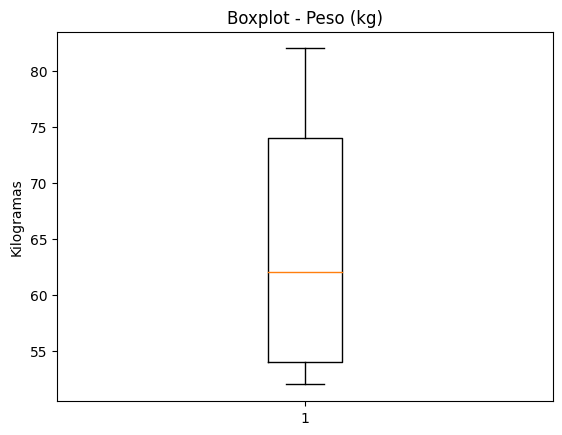

In [ ]:
fig, ax = plt.subplots()

#Comando para fazer um boxplot
ax.boxplot(d['peso_kg'])

#Título do gráfico
ax.set_title("Boxplot - Peso (kg)")

#Nome do eixo y
ax.set_ylabel('Kilogramas')

#Mostrando o gráfico
plt.show()

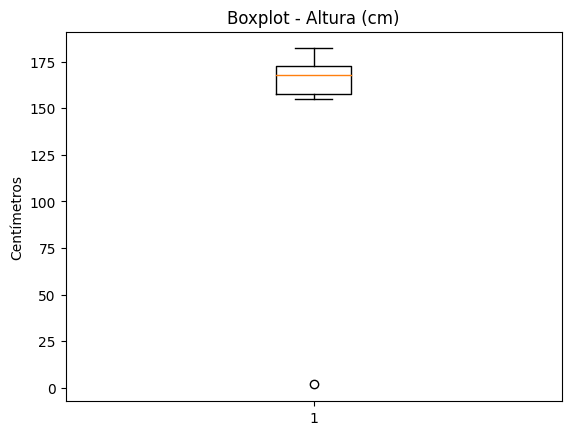

In [ ]:
fig, ax = plt.subplots()

#Comando para fazer um boxplot
ax.boxplot(d['altura_cm'])

#Título do gráfico
ax.set_title("Boxplot - Altura (cm)")

#Nome do eixo y
ax.set_ylabel('Centímetros')

#Mostrando o gráfico
plt.show()

A partir dos gráficos, vê-se que somente a altura possui um outlier.

Podemos eliminá-lo:

In [ ]:
d_elim = d[d['altura_cm'] >= 150]
d_elim

,nome,altura_cm,peso_kg,nacionalidade
0,José,175.0,68,México
1,Miguel,182.0,82,Brasil
2,Maria,168.0,56,Brasil
3,Cláudia,155.0,52,Brasil
4,Marta,160.0,52,Senegal
6,Mônica,170.0,62,Brasil


Ou podemos ver se há alguma forma de alterá-lo

In [ ]:
d.describe()

,altura_cm,peso_kg
count,7.000000,7.000000
mean,144.542857,64.571429
std,63.577744,12.581165
min,1.800000,52.000000
25%,157.500000,54.000000
50%,168.000000,62.000000
75%,172.500000,74.000000
max,182.000000,82.000000


In [ ]:
d['altura_cm'].loc[d['altura_cm'] == 180.0] = 130
d

<ipython-input-18-7aade041fcd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['altura_cm'].loc[d['altura_cm'] == 180.0] = 130


,nome,altura_cm,peso_kg,nacionalidade
0,José,175.0,68,México
1,Miguel,182.0,82,Brasil
2,Maria,168.0,56,Brasil
3,Cláudia,155.0,52,Brasil
4,Marta,160.0,52,Senegal
5,Júlio,130.0,80,Austrália
6,Mônica,170.0,62,Brasil


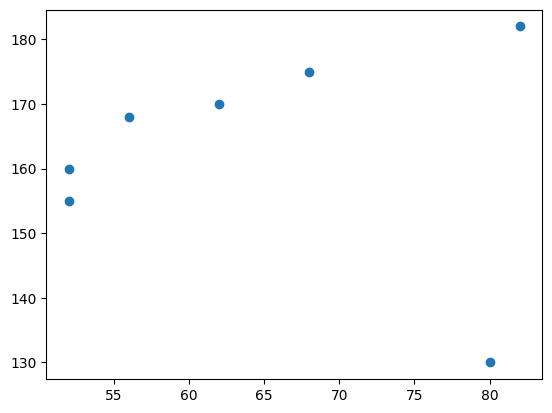

In [ ]:
plt.scatter(x = d["peso_kg"], y = d["altura_cm"])
plt.show()

Claro, isso normalmente não é factível pelo tamanho de um dataset

# Sua Vez

Lembra aquele arquivo de vôlei que vimos na aula passada?

[Cópia de 2019volleyball](https://docs.google.com/spreadsheets/d/1bmr8k5C7juVLMOqA0K43gYHLol0AB3Ar/edit?usp=sharing&ouid=112041259123429663700&rtpof=true&sd=true)

Vamos explorar este banco de dados!

Utilizando as técnicas e comandos vistos nesta prática, faça um pré-processamento de dados:
* verifique a nomeação de colunas (e se necessário, mude o nome),
* verifique os dados ausentes,
* verifique os dados redundantes
* verifique outliers

# Referências

FACELI, Katti et al. **Inteligência artificial: uma abordagem de aprendizado de máquina**. Rio de Janeiro: LTC, 2011.

PADILHA, V.; CARVALHO, A. Mineração de Dados em Python - Capítulo 3. São Paulo: ICMC-USP, 2017. Disponível em: [Pré-Processamento](https://edisciplinas.usp.br/pluginfile.php/4052836/mod_resource/content/4/mineracaodadosbiologicos-parte3.pdf)